In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In [2]:
df=pd.read_csv('C:/Users/HP/Desktop/data science/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold



In [3]:
df.shape

(18249, 14)

There are 18249 rows and 14 columns in this dataset

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [7]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [8]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values are present

In [9]:
df.duplicated().sum()

0

<Axes: >

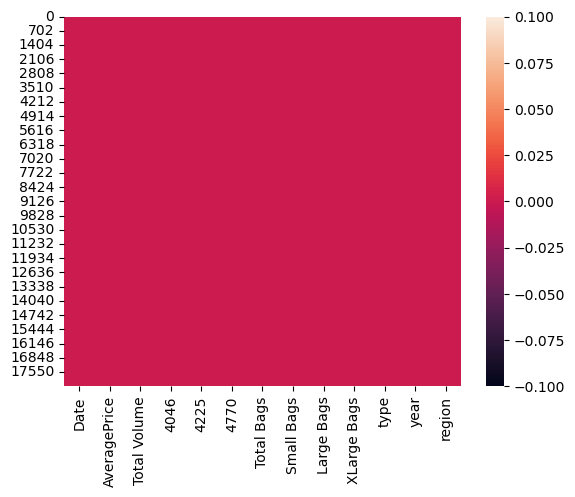

In [10]:
sns.heatmap(df.isnull())

we can clearly visualize that there is no null values are presnt

In [11]:
#converting date column from object to datetime
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [12]:
df.set_index('Date')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
Date,,,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21


In [13]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [14]:
#checking for value counts
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Date
2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: count, Length: 169, dtype: int64


AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64


Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64


4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64


4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.9

In [15]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
min,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281


1.This gives the statistical summary of numerical columns. The summary of the dataset looks perfect since there is no negative or invalid values are present. Also, the mean and 50%value of most of the column are same and the STD and mean are very close to each other. 2.In this dataset count of all columns are same,which means there is no missing values are present. 3.The median(50%) is greater than mean which means skewness is preset 4.By summarizing the data there is less diff between 75% and max Which means muchoutliers are present.

type
conventional    9126
organic         9123
Name: count, dtype: int64

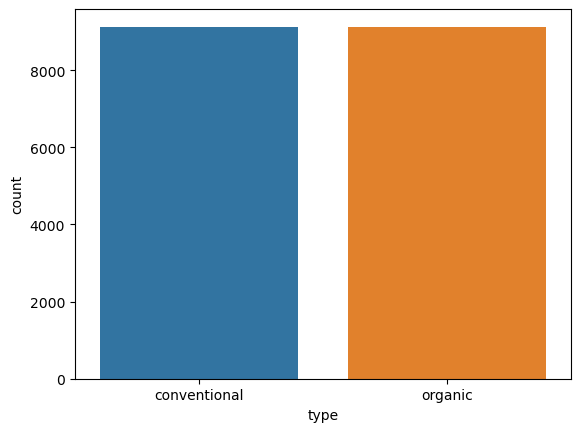

In [16]:
ax=sns.countplot(x='type',data=df)
df['type'].value_counts()

<Axes: xlabel='type', ylabel='AveragePrice'>

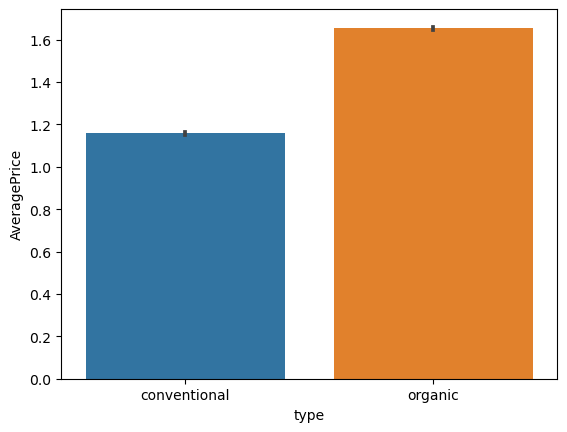

In [17]:
sns.barplot(x='type',y='AveragePrice',data=df)

<Axes: xlabel='year', ylabel='AveragePrice'>

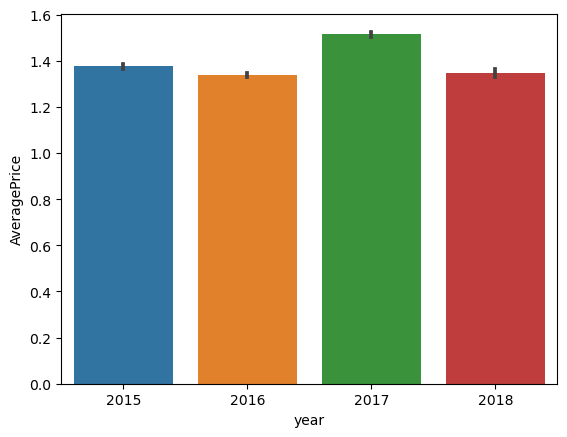

In [18]:
sns.barplot(x='year',y='AveragePrice',data=df)

In [19]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [20]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [21]:
df['type']=df['type'].replace({'conventional':0,'organic':1})

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

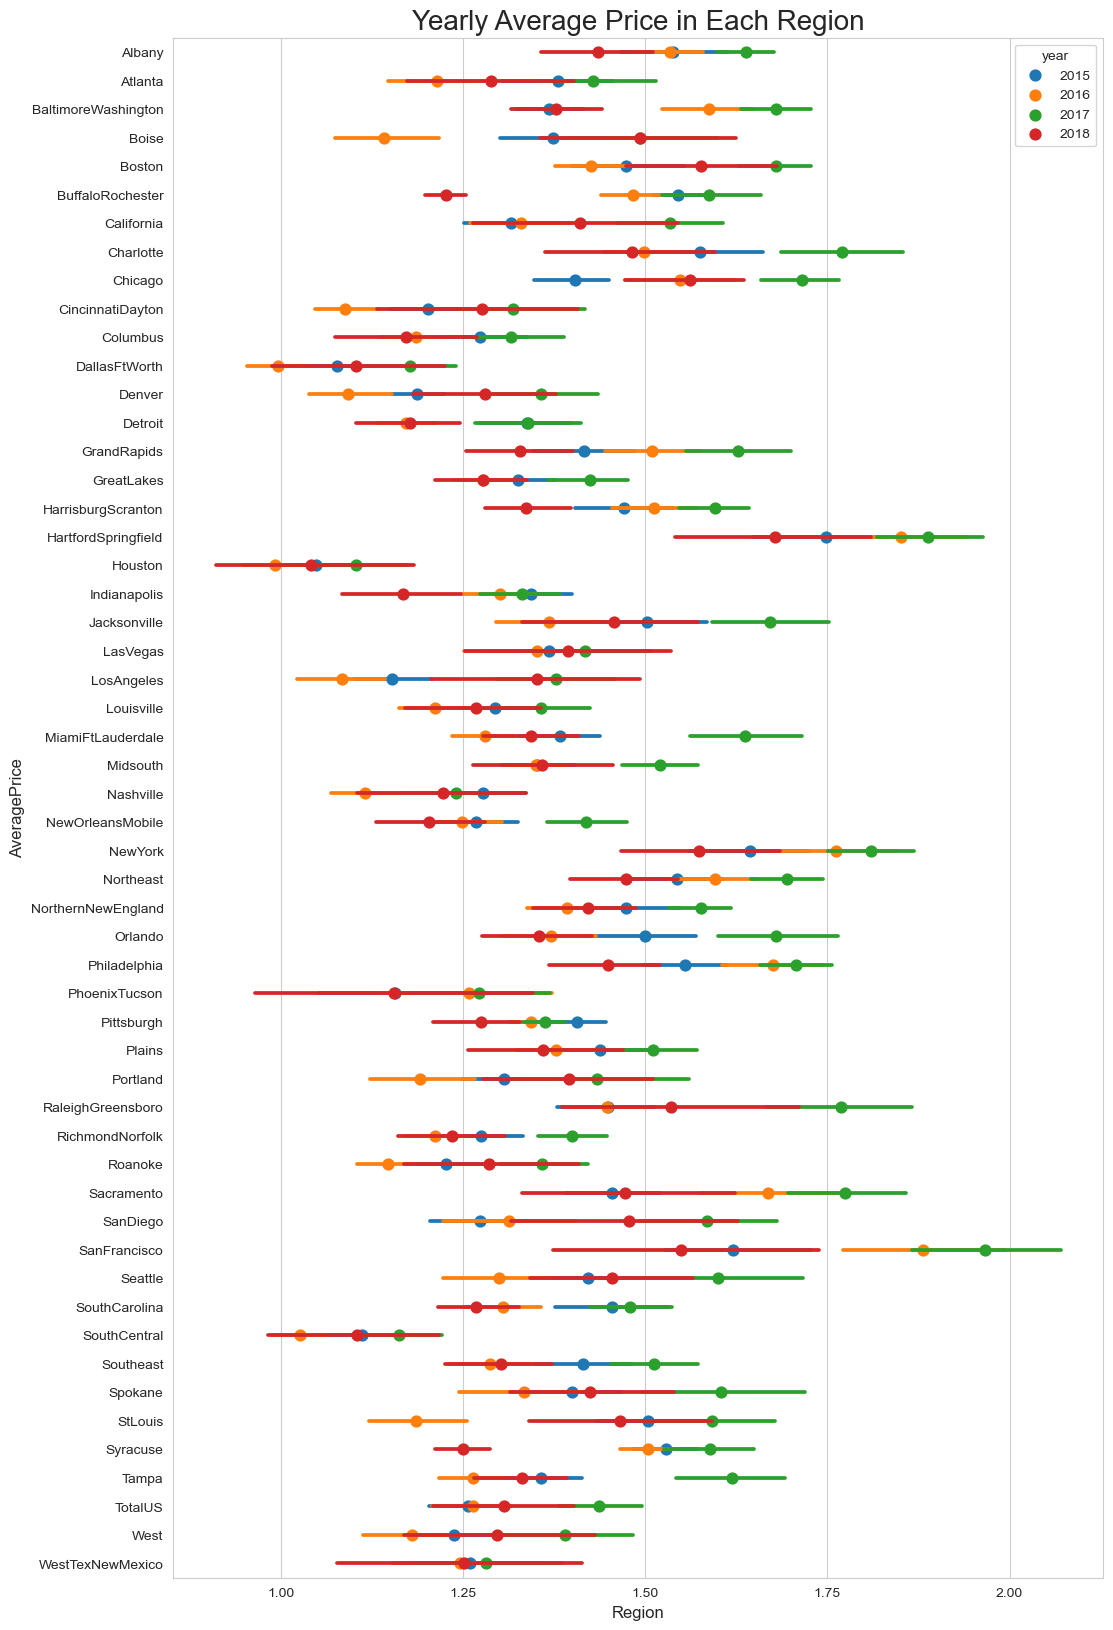

In [22]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

In [23]:
df['region'].nunique()

54

As we can see we have 54 regions , so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.
I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.





In [24]:
df.drop(columns=['region','Date'],axis=1,inplace=True)

In [25]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20


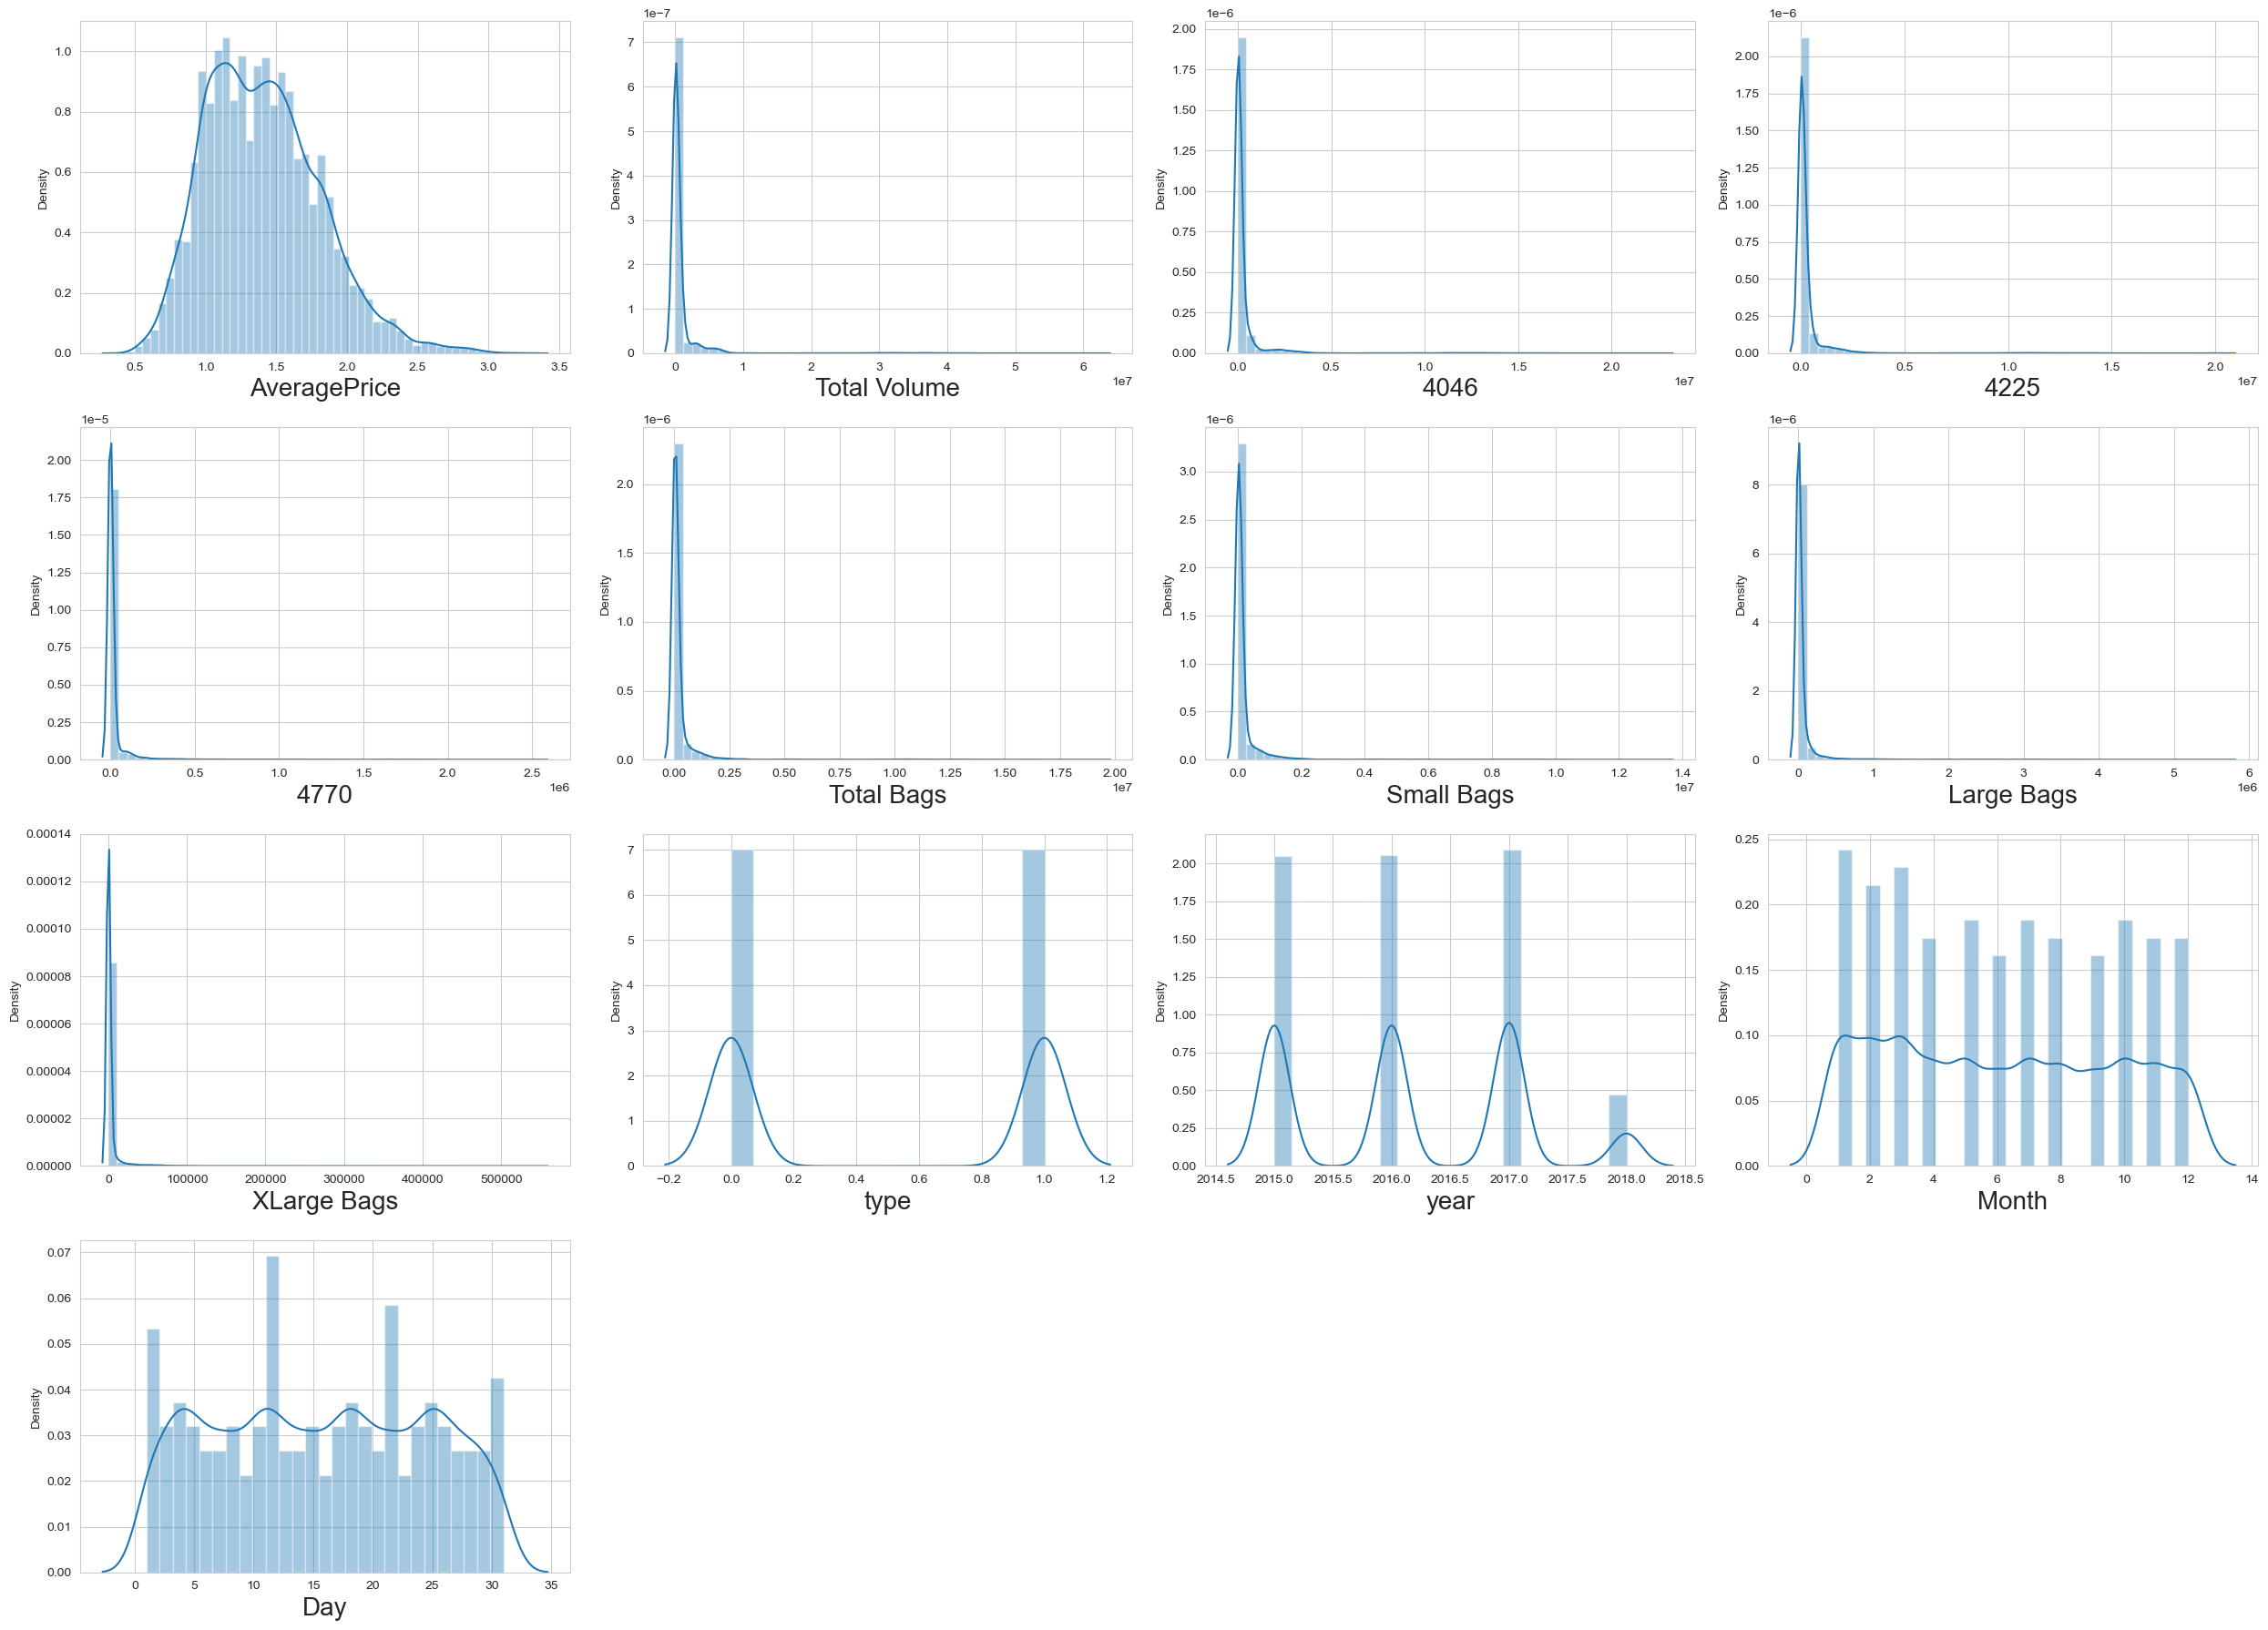

In [26]:
plt.figure(figsize=(25,18))
graph=1
for column in df:
    if graph<14:
        ax=plt.subplot(4,4,graph)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        graph +=1
        plt.tight_layout()

# Checking for outliers

AveragePrice       Axes(0.125,0.712609;0.110714x0.167391)
Total Volume    Axes(0.257857,0.712609;0.110714x0.167391)
4046            Axes(0.390714,0.712609;0.110714x0.167391)
4225            Axes(0.523571,0.712609;0.110714x0.167391)
4770            Axes(0.656429,0.712609;0.110714x0.167391)
Total Bags      Axes(0.789286,0.712609;0.110714x0.167391)
Small Bags         Axes(0.125,0.511739;0.110714x0.167391)
Large Bags      Axes(0.257857,0.511739;0.110714x0.167391)
XLarge Bags     Axes(0.390714,0.511739;0.110714x0.167391)
type            Axes(0.523571,0.511739;0.110714x0.167391)
year            Axes(0.656429,0.511739;0.110714x0.167391)
Month           Axes(0.789286,0.511739;0.110714x0.167391)
Day                 Axes(0.125,0.31087;0.110714x0.167391)
dtype: object

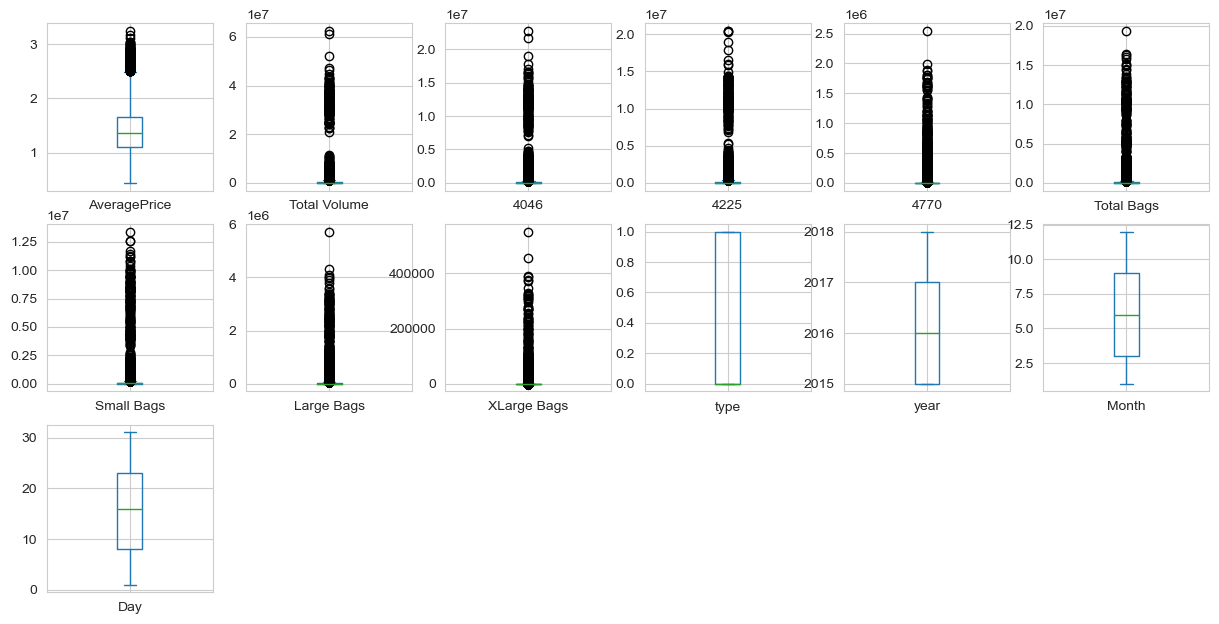

In [27]:
df.plot(kind='box',subplots=True,layout=(4,6),figsize=(15,10))

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836,1.221282,1.647632,1.291857
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836,1.221282,1.647632,0.494231
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836,1.221282,1.647632,0.303396
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836,1.221282,1.647632,1.101022
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836,1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.000164,1.970504,1.181997,1.328915
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.000164,1.970504,1.464959,1.405803
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.000164,1.970504,1.464959,0.608177
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.000164,1.970504,1.464959,0.189449


In [29]:
#thresold=3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [30]:
df1=df[(z<3).all(axis=1)]
df1.shape

(17651, 13)

In [31]:
print("old df",df.shape)
print("new df",df1.shape)

old df (18249, 13)
new df (17651, 13)


In [32]:
print("Data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage- 3.276891884486821


Checking for skewness

In [33]:
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
Month           0.107408
Day             0.011778
dtype: float64

In [34]:
df1['Total Volume']=np.cbrt(df1['Total Volume'])
df1['4046']=np.cbrt(df1['4046'])
df1['4225']=np.cbrt(df1['4225'])
df1['4770']=np.cbrt(df1['4770'])
df1['Total Bags']=np.cbrt(df1['Total Bags'])
df1['Small Bags']=np.cbrt(df1['Small Bags'])
df1['Large Bags']=np.cbrt(df1['Large Bags'])
df1['XLarge Bags']=np.cbrt(df1['XLarge Bags'])

In [35]:
df1.skew()

AveragePrice    0.377432
Total Volume    1.240435
4046            1.555876
4225            1.277025
4770            1.635614
Total Bags      1.231831
Small Bags      1.246033
Large Bags      1.276213
XLarge Bags     2.277028
type           -0.037741
year            0.229976
Month           0.107408
Day             0.011778
dtype: float64

In [36]:
df1['Total Volume']=np.cbrt(df1['Total Volume'])
df1['4046']=np.cbrt(df1['4046'])
df1['4225']=np.cbrt(df1['4225'])
df1['4770']=np.cbrt(df1['4770'])
df1['Total Bags']=np.cbrt(df1['Total Bags'])
df1['Small Bags']=np.cbrt(df1['Small Bags'])
df1['Large Bags']=np.cbrt(df1['Large Bags'])
df1['XLarge Bags']=np.cbrt(df1['XLarge Bags'])

In [37]:
df1.skew()

AveragePrice    0.377432
Total Volume    0.340102
4046            0.083828
4225            0.002759
4770           -0.102949
Total Bags      0.141323
Small Bags     -0.290344
Large Bags     -0.665466
XLarge Bags     1.036551
type           -0.037741
year            0.229976
Month           0.107408
Day             0.011778
dtype: float64

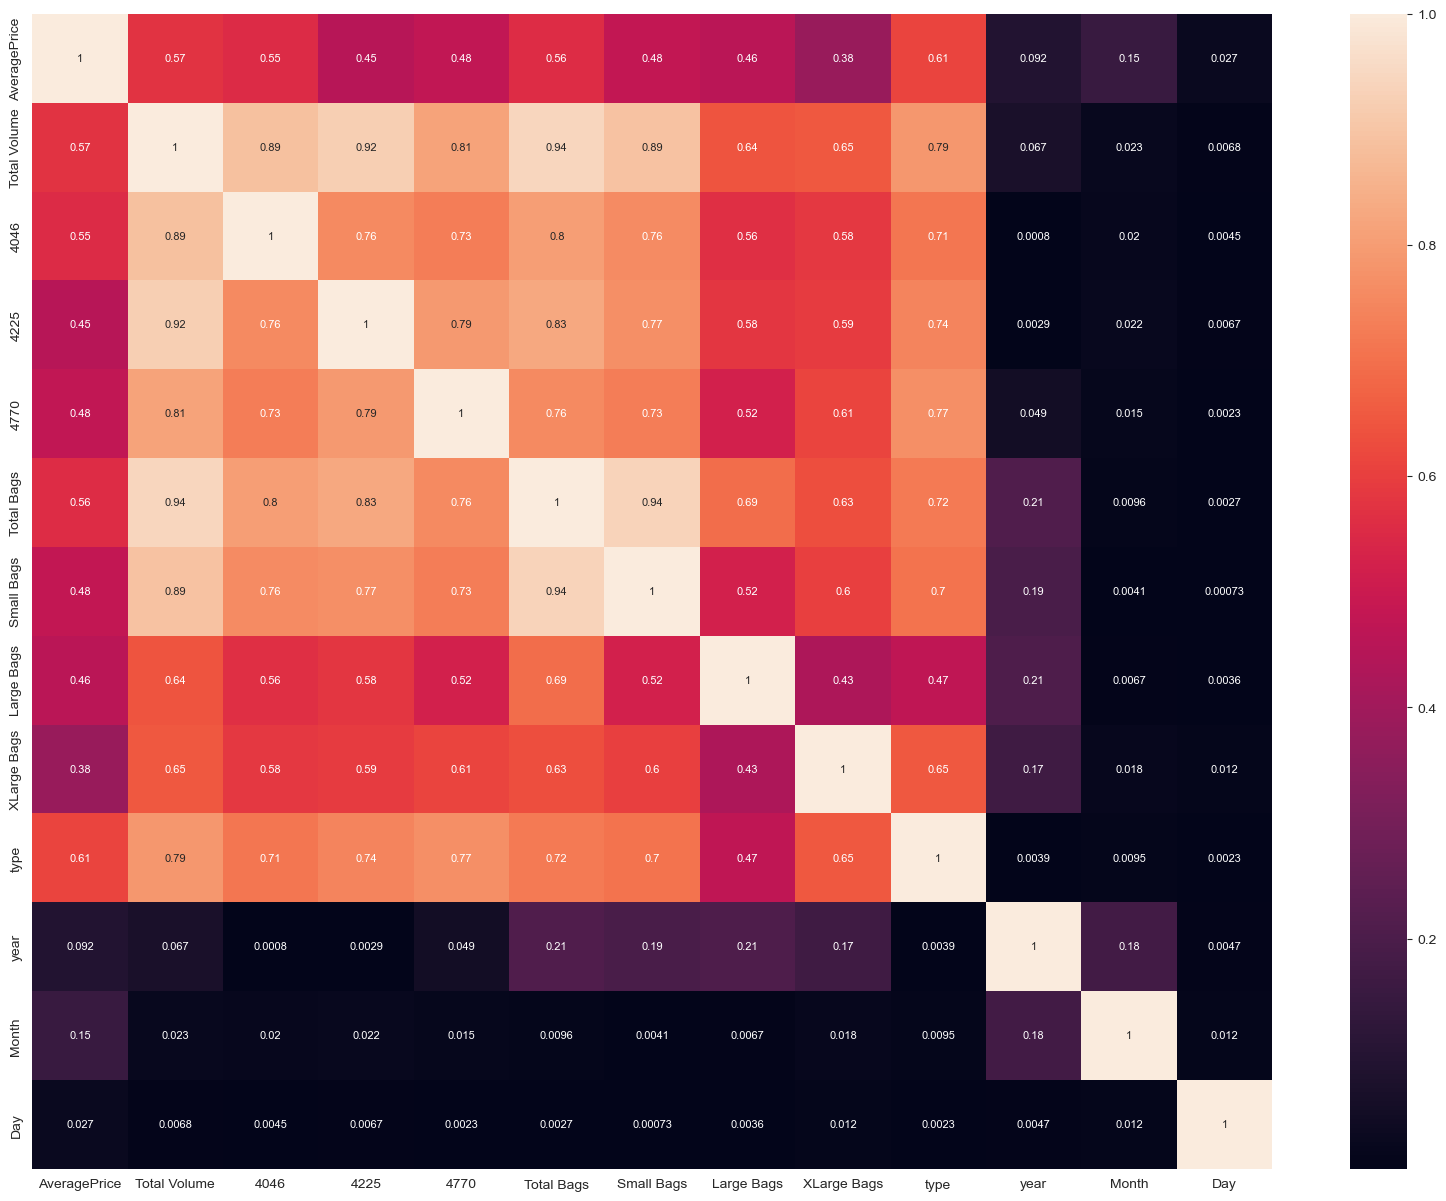

In [38]:
df1_corr=df1.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df1_corr,annot=True,annot_kws={'size':8})
plt.show()

As we can from the heatmap above, all the Features are not correlated with the Average Price column, instead most of them are correlated with each othe

In [39]:
x=df1.drop(columns=['AveragePrice'],axis=1)
y=df1['AveragePrice']

In [40]:
x.shape,y.shape

((17651, 12), (17651,))

# Feature scaling using standard scalarization

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.179235,-0.666994,0.324844,-0.042483,-0.566364,-0.331831,-0.507022,-0.659564,-1.019047,-1.210013,1.644612,1.289309
1,-0.248376,-0.767937,0.241952,-0.015166,-0.528893,-0.297199,-0.499598,-0.659564,-1.019047,-1.210013,1.644612,0.491652
2,0.100289,-0.729948,0.629663,0.106229,-0.593739,-0.357748,-0.490139,-0.659564,-1.019047,-1.210013,1.644612,-0.306004
3,-0.086594,-0.645767,0.444313,0.016718,-0.731708,-0.488446,-0.445718,-0.659564,-1.019047,-1.210013,1.644612,-1.103660
4,-0.279800,-0.690031,0.234497,0.023104,-0.706690,-0.468887,-0.376504,-0.659564,-1.019047,-1.210013,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.724912,-0.497188,-0.918499,-1.312143,-0.377429,-0.166922,-0.228715,-0.659564,0.981309,1.980756,-1.180379,-1.331562
17647,-0.802981,-0.633260,-0.678753,-1.312143,-0.539741,-0.317011,-0.284086,-0.659564,0.981309,1.980756,-1.462878,1.403260
17648,-0.806257,-0.633215,-0.780970,0.404709,-0.533885,-0.299534,-0.633024,-0.659564,0.981309,1.980756,-1.462878,0.605603
17649,-0.744837,-0.571810,-0.722058,0.404465,-0.467742,-0.238704,-0.607311,-0.659564,0.981309,1.980756,-1.462878,-0.192053


# Variance inflation factor

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,58.321733,Total Volume
1,6.978044,4046
2,11.871679,4225
3,3.749616,4770
4,29.390248,Total Bags
5,11.246325,Small Bags
6,2.670036,Large Bags
7,2.021740,XLarge Bags
8,3.342421,type
9,1.430403,year


# Finding best random state

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [44]:
maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best r2_score is",maxAccu,"at random state",maxRS)

Best r2_score is 0.5418469516722069 at random state 0
Best r2_score is 0.5468279103456916 at random state 1
Best r2_score is 0.5569108275186279 at random state 3
Best r2_score is 0.561440783597607 at random state 5
Best r2_score is 0.5649067684250707 at random state 6
Best r2_score is 0.5709428988220475 at random state 28


# Model Building:


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  ExtraTreesRegressor


In [46]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(lr)
print('R2_score:',r2_score(y_test,pred_lr))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_lr))
print("mean squared error:",mean_squared_error(y_test,pred_lr))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_lr)))

LinearRegression()
R2_score: 0.548643914834086
R2_score on training data: 55.27560882298168
Mean absolute error: 0.20095563651655243
mean squared error: 0.06500422019995437
Root mean squared error: 0.254959252038349


In [47]:
RFR= RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print('R2_score:',r2_score(y_test,pred_RFR))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_RFR))
print("mean squared error:",mean_squared_error(y_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))


RandomForestRegressor()
R2_score: 0.8616707884125311
R2_score on training data: 98.01993246106858
Mean absolute error: 0.10015847809667672
mean squared error: 0.019922147558534737
Root mean squared error: 0.14114583790723245


In [48]:
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_dt=dt.predict(x_test)
pred_train=lr.predict(x_train)
print(dt)
print('R2_score:',r2_score(y_test,pred_dt))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_dt))
print("mean squared error:",mean_squared_error(y_test,pred_dt))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_dt)))


DecisionTreeRegressor()
R2_score: 0.6864427370948403
R2_score on training data: 55.27560882298168
Mean absolute error: 0.14126132930513596
mean squared error: 0.04515845921450151
Root mean squared error: 0.21250519808819152


In [49]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
pred_ada=ada.predict(x_test)
pred_train=ada.predict(x_train)
print(ada)
print('R2_score:',r2_score(y_test,pred_ada))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_ada))
print("mean squared error:",mean_squared_error(y_test,pred_ada))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_ada)))

AdaBoostRegressor()
R2_score: 0.5485892437668669
R2_score on training data: 56.232855595766026
Mean absolute error: 0.20536688497284994
mean squared error: 0.06501209391697933
Root mean squared error: 0.25497469269905854


In [50]:
svm = SVR()
svm.fit(x_train, y_train)
pred_svm=svm.predict(x_test)
pred_train=svm.predict(x_train)
print(svm)
print('R2_score:',r2_score(y_test,pred_svm))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_svm))
print("mean squared error:",mean_squared_error(y_test,pred_svm))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_svm)))


SVR()
R2_score: 0.766352761016238
R2_score on training data: 78.31310668581861
Mean absolute error: 0.13763115943566623
mean squared error: 0.03364983229688563
Root mean squared error: 0.18343890617010786


# Cross validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
score1=cross_val_score(lr,x,y,cv=5,scoring='r2')
print("score1")
print(score1.mean())
print("Diff between r2_score and cross validation-",(r2_score(y_test,pred_lr)-score1.mean())*100)

score1
0.18632549631831616
Diff between r2_score and cross validation- 36.23184185157699


In [53]:
score2=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print("score2")
print(score2.mean())
print("Diff between r2_score and cross validation-",(r2_score(y_test,pred_RFR)-score2.mean())*100)

score2
0.20923531992500655
Diff between r2_score and cross validation- 65.24354684875246


In [54]:
score3=cross_val_score(dt,x,y,cv=5,scoring='r2')
print("score3")
print(score1.mean())
print("Diff between r2_score and cross validation-",(r2_score(y_test,pred_lr)-score3.mean())*100)

score3
0.18632549631831616
Diff between r2_score and cross validation- 82.51987983143918


In [55]:
score4=cross_val_score(svm,x,y,cv=5,scoring='r2')
print("score4")
print(score4.mean())
print("Diff between r2_score and cross validation-",(r2_score(y_test,pred_lr)-score4.mean())*100)

score4
0.20824636237146596
Diff between r2_score and cross validation- 34.039755246262004


 Iam selecting SVM is best for model because,difference between R2 score and cross validation is less in RFR